100%|██████████| 170M/170M [00:03<00:00, 54.3MB/s]


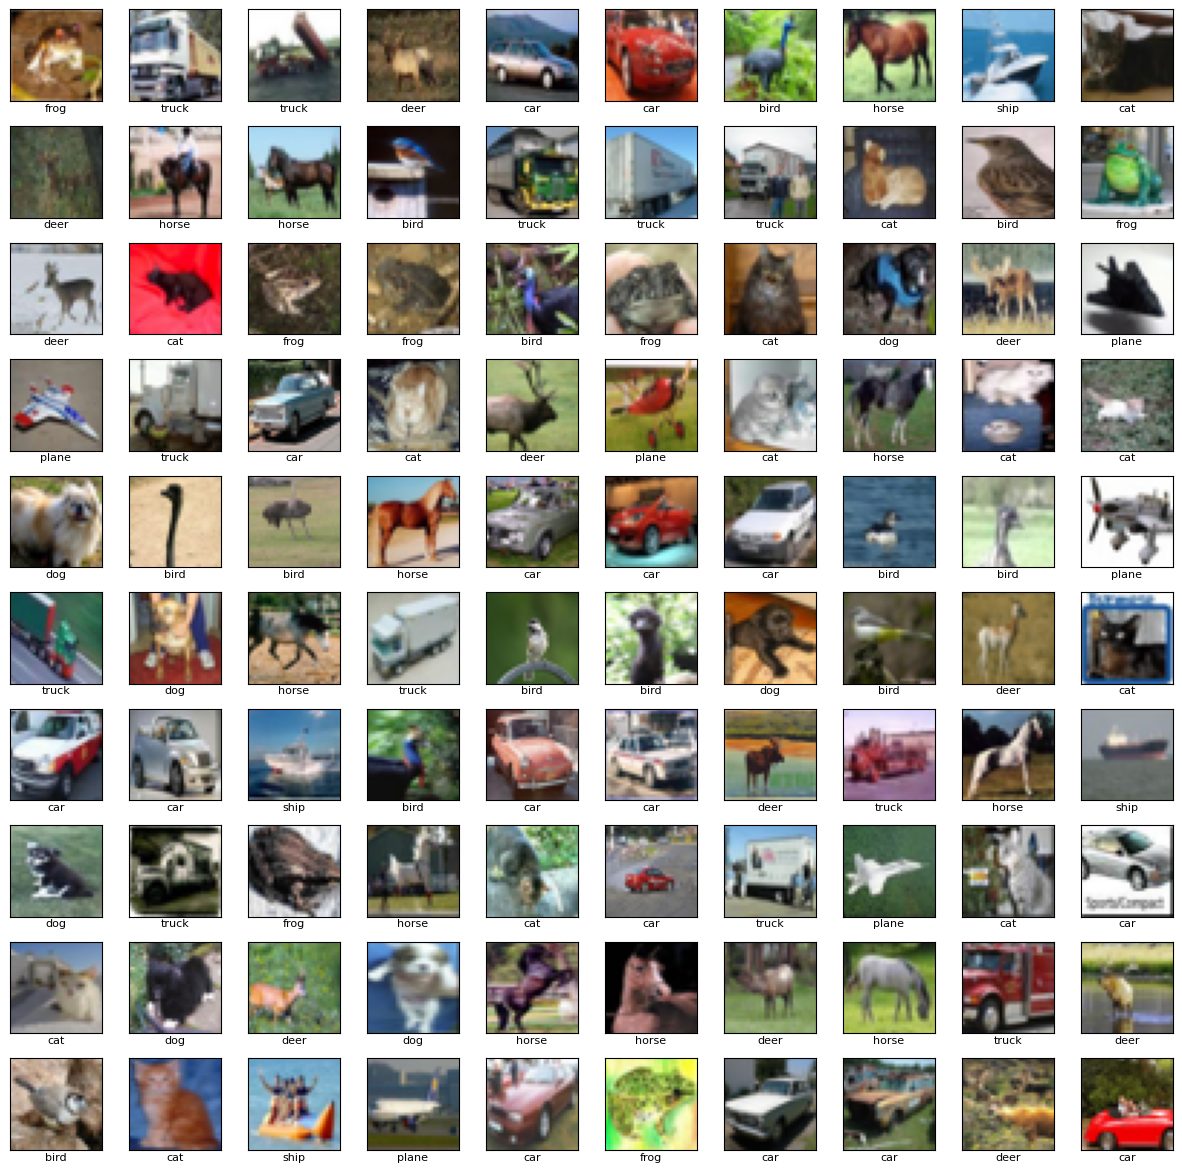

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# torchvision.transforms.Compose()を使用して、
# 画像データの前処理パイプラインを定義
transform = transforms.Compose([
    transforms.ToTensor(),  # 画像データをPyTorchのテンソルに変換
])
# CIFAR-10のデータセットをダウンロード（download origin not clear）
trainset = torchvision.datasets.CIFAR10(
    # データセットのダウンロード先は作業ディレクトリ以下のdataフォルダー
    root='./data',
    # 訓練用のデータセットをロードすることを指定
    train=True,
    # ディレクトリにデータセットが存在しない場合はインターネットからダウンロードする
    download=True,
    # データセットに適用する前処理を指定
    transform=transform)
# データローダーの設定
trainloader = torch.utils.data.DataLoader(
    trainset, # ロードした訓練データセット
    batch_size=100,# 100枚の画像を一つのバッチとして処理
    shuffle=False, # データをランダムにシャッフルしない
    num_workers=2) # データローディングのために使用するサブプロセスの数を指定

# クラスラベルの定義
classes = (
    'plane', 'car', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck')

# データローダーから100枚の画像とラベルを取得
dataiter = iter(trainloader)
images, labels = next(dataiter)

# 画像を表示する関数
def imshow(img):
    # PyTorchのテンソルをNumPy配列に変換
    npimg = img.numpy()
    # PyTorchの画像データ(チャネル数, 高さ, 幅)を
    # (高さ, 幅, チャネル数)の形状に変換して出力
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# 描画領域のサイズを設定
fig = plt.figure(figsize=(15, 15))
# CIFAR-10データセットの画像を10x10のグリッドで表示し、
# 各画像の下にクラスラベルを表示
for i in range(100):
    # 10x10のグリッドを作成し、i+1番目の位置にプロットエリアを追加
    ax = fig.add_subplot(10, 10, i+1, xticks=[], yticks=[])
    # i番目の画像を表示
    imshow(images[i])
    # タイトル(クラスラベル)の表示位置を調整
    ax.set_title(classes[labels[i]], fontsize=8, y=-0.2)
# プロットエリアの間隔を調整
plt.subplots_adjust(hspace=0.1, wspace=0.3)
plt.show()
